In [1]:
%who

Interactive namespace is empty.


In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

# select a time slice
time_slice = slice('1911-01-01', '2020-05-31')

# the original deficits
sm_deficits_file = 'sm_droughts/deficits_basedOn_futureDay_wIntercep/sm_events_[1-2]*.nc'
PmEQ_file = 'sm_droughts/deficits_basedOn_futureDay_wIntercep/PmEQ_events_[1-2]*.nc'

ds_sm1 = xr.open_mfdataset(main_dir + sm_deficits_file)
ds_PmEQ1 = xr.open_mfdataset(main_dir + PmEQ_file)

da_sm1 = ds_sm1['sm_deficit'].sel(time = time_slice) #.chunk(chunks = {'lat':40,'lon':40,'time':-1})
da_PmEQ1 = ds_PmEQ1['PminusEQ'].sel(time = time_slice)

# the updated deficits based on future day
sm_deficits_file = 'sm_droughts/deficits_basedOn_futureDay_wIntercep_bySeas/sm_events_[1-2]*.nc'
PmEQ_file = 'sm_droughts/deficits_basedOn_futureDay_wIntercep_bySeas/PmEQ_events_[1-2]*.nc'

ds_sm2 = xr.open_mfdataset(main_dir + sm_deficits_file)
ds_PmEQ2 = xr.open_mfdataset(main_dir + PmEQ_file)

da_sm2 = ds_sm2['sm_deficit'].sel(time = time_slice) #.chunk(chunks = {'lat':40,'lon':40,'time':-1})
da_PmEQ2 = ds_PmEQ2['PminusEQ'].sel(time = time_slice)

In [ ]:
da_PmEQ2

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...   

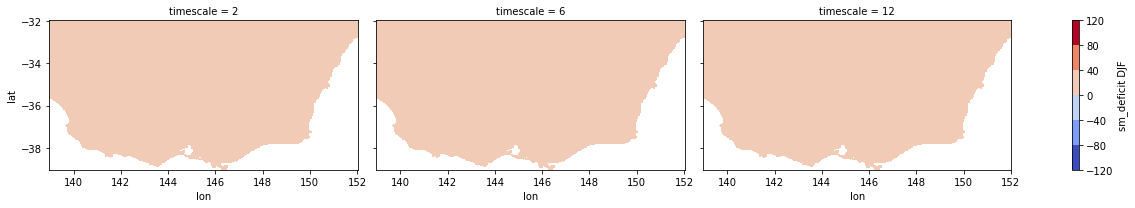

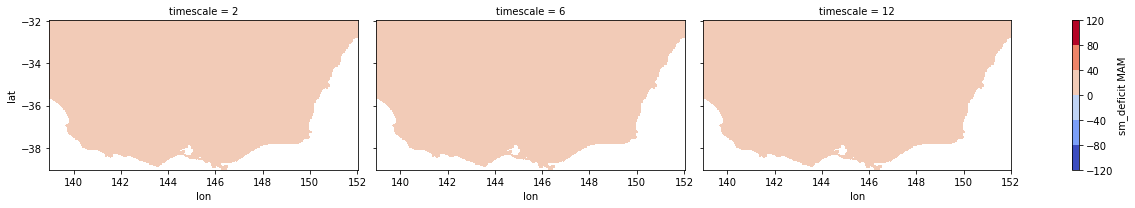

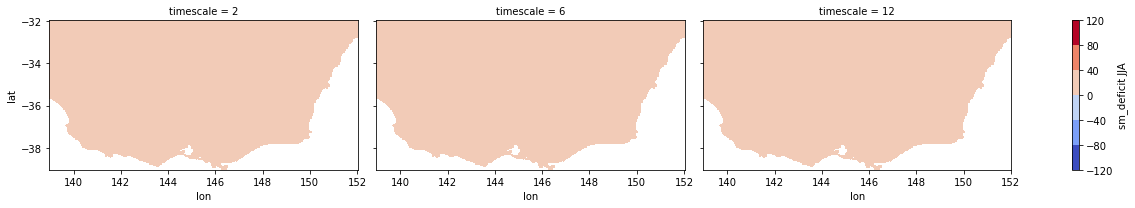

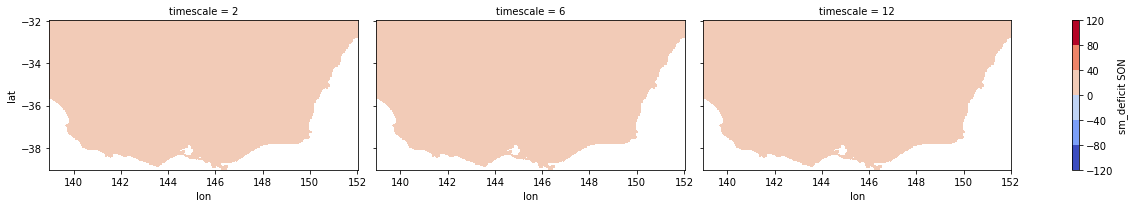

In [2]:
import matplotlib.pyplot as plt

outdir = 'figures/drought_events/'
figname_prefix = 'sm_deficit_mean_diff_seasRegr_'

da_sm_diff = da_sm2.mean('time') - da_sm1.mean('time')
da_sm_diff_seas = da_sm2.groupby('time.season').mean('time') - da_sm1.groupby('time.season').mean('time')

lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size
levels = np.linspace(-120, 120, 7)
for seas in ['DJF', 'MAM', 'JJA', 'SON']:
    da_sm_diff_seas.sel(season = seas).rename('sm_deficit ' + seas).plot(col = "timescale", col_wrap = 3, aspect = aspect, size = 3, cmap = "coolwarm", levels = levels) #"RdBu_r")
    plt.savefig(outdir + figname_prefix + '_' + seas + '.png')

In [4]:
da_PmEQ1

<xarray.DataArray 'PminusEQ' (timescale: 3, time: 39964, lat: 141, lon: 261)>
dask.array<getitem, shape=(3, 39964, 141, 261), dtype=float64, chunksize=(3, 3653, 141, 261), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float32 -32.0 -32.05 -32.1 -32.15 ... -38.9 -38.95 -39.0
  * lon        (lon) float32 139.0 139.1 139.1 139.1 ... 151.9 151.9 151.9 152.0
    quantile   float64 0.3
  * time       (time) datetime64[ns] 1911-01-01 1911-01-02 ... 2020-05-31
    dayofyear  (time) int64 dask.array<chunksize=(3653,), meta=np.ndarray>
  * timescale  (timescale) int64 2 6 12

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...   

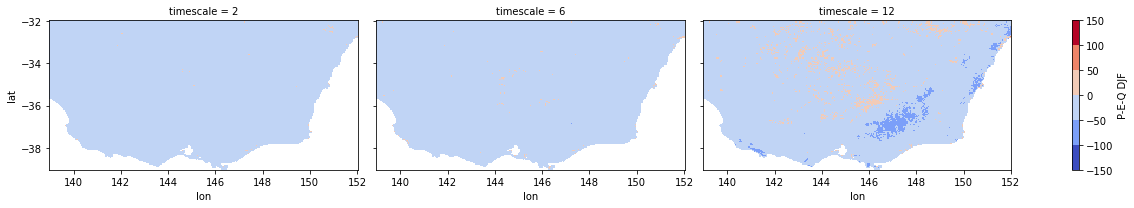

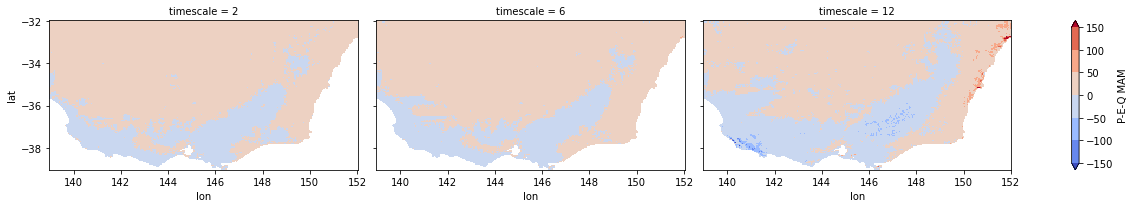

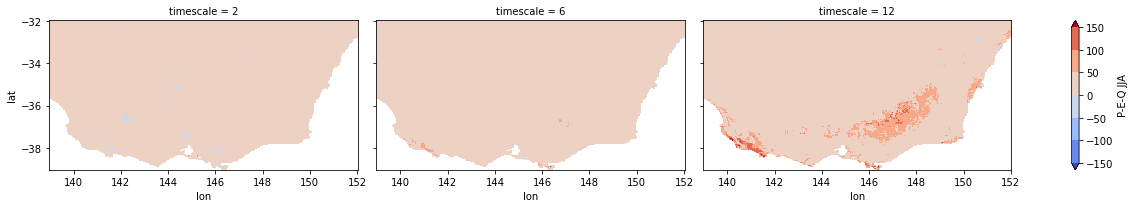

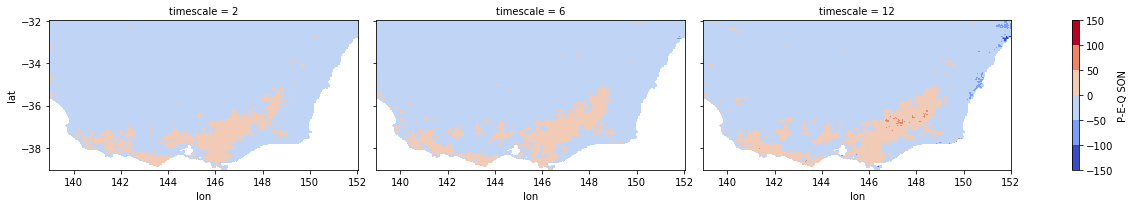

In [5]:
import matplotlib.pyplot as plt

da_PmEQ_diff_seas = da_PmEQ2.groupby('time.season').mean('time') - da_PmEQ1.groupby('time.season').mean('time')
da_PmEQ_diff_seas.load()

outdir = 'figures/drought_events/'
figname_prefix = 'PmEQ_mean_diff_seasRegr'

lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size
levels = np.linspace(-150, 150, 7)
for seas in ['DJF', 'MAM', 'JJA', 'SON']:
    da_PmEQ_diff_seas.sel(season = seas).rename('P-E-Q ' + seas).plot(col = "timescale", col_wrap = 3, aspect = aspect, size = 3, cmap = "coolwarm", levels = levels) #"RdBu_r")
    plt.savefig(outdir + figname_prefix + '_' + seas + '.png')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...   

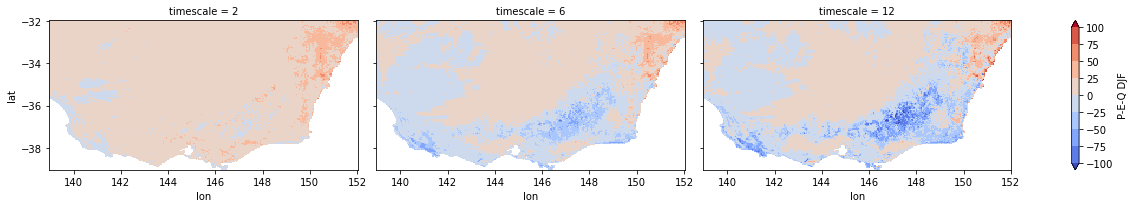

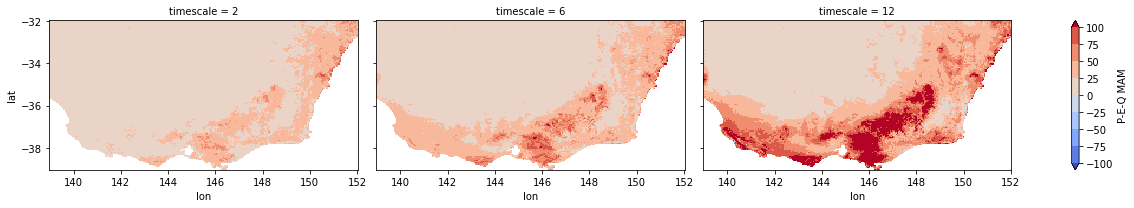

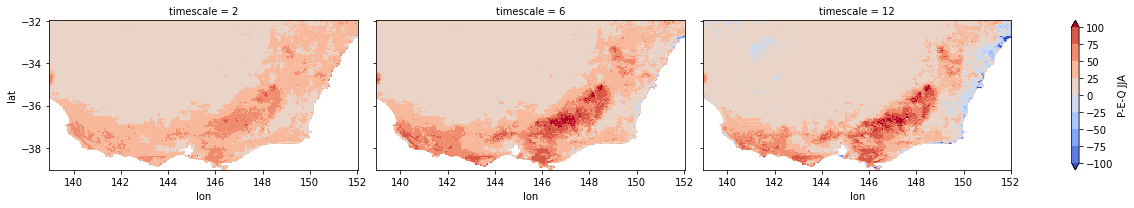

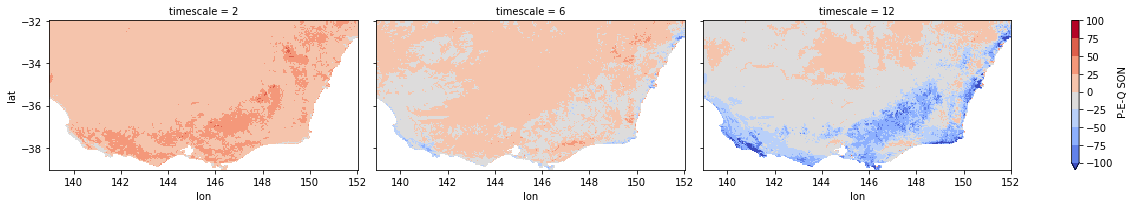

In [6]:
import matplotlib.pyplot as plt

da_PmEQ2_seas = da_PmEQ2.groupby('time.season').mean('time').load()

figname_prefix = 'PmEQ_using_futureDay_seasRegr_mean'

lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size
levels = np.linspace(-100, 100, 9)
for seas in ['DJF', 'MAM', 'JJA', 'SON']:
    da_PmEQ2_seas.sel(season = seas).rename('P-E-Q ' + seas).plot(col = "timescale", col_wrap = 3, aspect = aspect, size = 3, cmap = "coolwarm", levels = levels) #"RdBu_r")
    plt.savefig(outdir + figname_prefix + '_' + seas + '.png')

In [12]:
np.linspace(-100, 100, 11)

array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.,
         80.,  100.])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...   

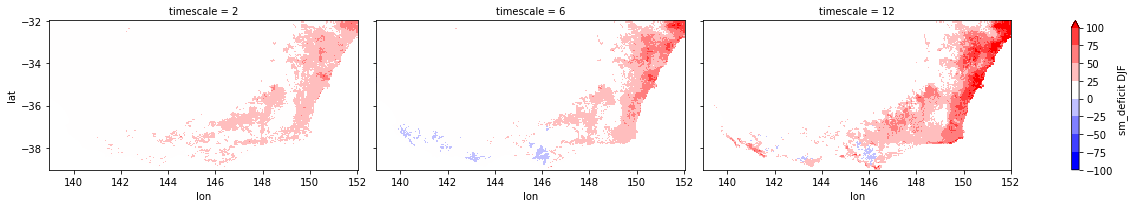

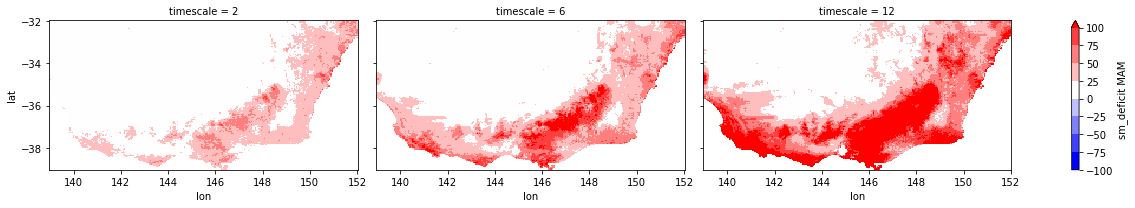

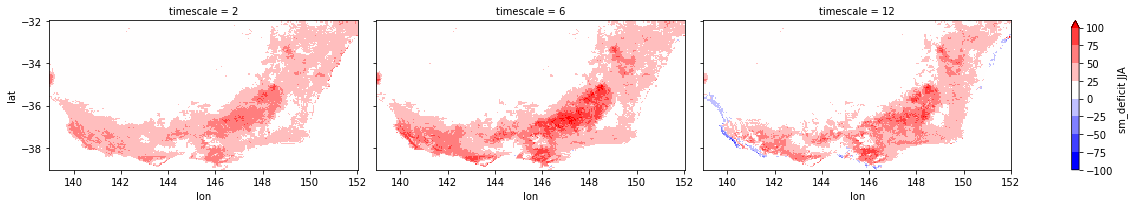

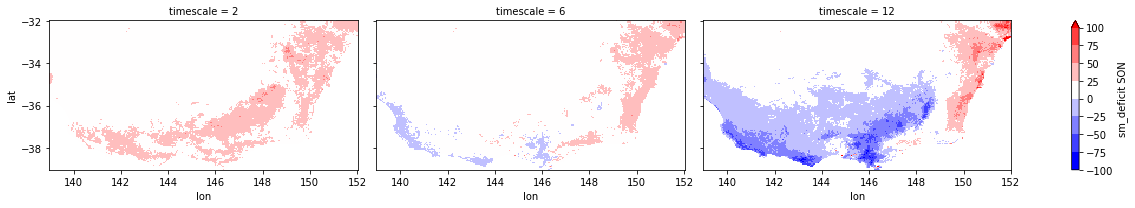

In [13]:
da_sm2_seas = da_sm2.groupby('time.season').mean('time').load()

figname_prefix = 'sm_deficit_using_futureDay_mean'

lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size
levels = np.linspace(-100, 100, 9)
for seas in ['DJF', 'MAM', 'JJA', 'SON']:
    da_PmEQ2_seas.sel(season = seas).rename('sm_deficit ' + seas).plot(col = "timescale", col_wrap = 3, aspect = aspect, size = 3, cmap = "bwr", levels = levels) #"RdBu_r")
    plt.savefig(outdir + figname_prefix + '_' + seas + '.png')

### Plot number of drought events, mean sm deficits, and P-E-Q thresholds

In [1]:
%who

Interactive namespace is empty.


In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

# select a time slice
time_slice = slice('1911-01-01', '2020-05-31')

# the original deficits
sm_deficits_file = 'sm_droughts/deficits_basedOn_futureDay_wIntercep_10_30perc_2Reg/sm_events_10_30perc_[1-2]*.nc' #deficits_basedOn_futureDay_wIntercep/sm_events_[1-2]*.nc' #deficits_basedOn_futureDay_wIntercep_10_50perc/sm_events_10_50perc_[1-2]*.nc'
PmEQ_file = 'sm_droughts/deficits_basedOn_futureDay_wIntercep_10_30perc_2Reg/PmEQ_events_10_30perc_[1-2]*.nc' #deficits_basedOn_futureDay_wIntercep/PmEQ_events_[1-2]*.nc' #deficits_basedOn_futureDay_wIntercep_10_50perc/PmEQ_events_10_50perc_[1-2]*.nc'
events_file = 'sm_droughts/deficits_basedOn_futureDay_wIntercep_10_30perc_2Reg/events_[1-2]*.nc' #events_[1-2]*.nc' #deficits_basedOn_futureDay_wIntercep_10_50perc/events_10_50perc_[1-2]*.nc'

ds_sm1 = xr.open_mfdataset(main_dir + sm_deficits_file)
ds_PmEQ1 = xr.open_mfdataset(main_dir + PmEQ_file)
ds_events = xr.open_mfdataset(main_dir + events_file)

da_sm1 = ds_sm1['sm_deficit'].sel(time = time_slice) #.chunk(chunks = {'lat':40,'lon':40,'time':-1})
da_PmEQ1 = ds_PmEQ1['PminusEQ'].sel(time = time_slice)
da_events = ds_events['sm_drought'].sel(time = time_slice)

from datetime import datetime, timedelta
t = np.arange(datetime(1911,1,1), datetime(2020,6,1), timedelta(days=1)).astype(datetime)
ndates = len(t)
ndates

da_PmEQ_mean_bySeas = da_PmEQ1.groupby('time.season').mean('time').load()
da_sm_mean_bySeas = da_sm1.groupby('time.season').mean('time').load()

# drought_prop = (da_events.sum('time')/39964).load()
# drought_prop_seas = (da_events.groupby('time.season').sum('time')/da_events.groupby('time.season').count('time')).load()

# drought_prop_land = drought_prop.where(drought_prop != 0, other = np.nan)  # keep only non-zero (over land). set ocean grid points to zero
# drought_prop_seas_land = drought_prop_seas.where(drought_prop != 0, other = np.nan)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...   

In [3]:
drought_prop = (da_events.sum('time')/39964).load()
drought_prop_seas = (da_events.groupby('time.season').sum('time')/da_events.groupby('time.season').count('time')).load()

drought_prop_land = drought_prop.where(drought_prop != 0, other = np.nan)  # keep only non-zero (over land). set ocean grid points to zero
drought_prop_seas_land = drought_prop_seas.where(drought_prop != 0, other = np.nan)

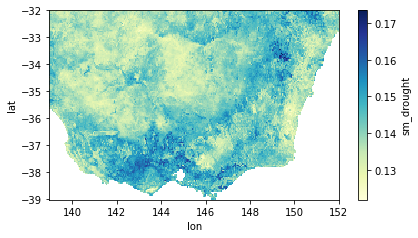

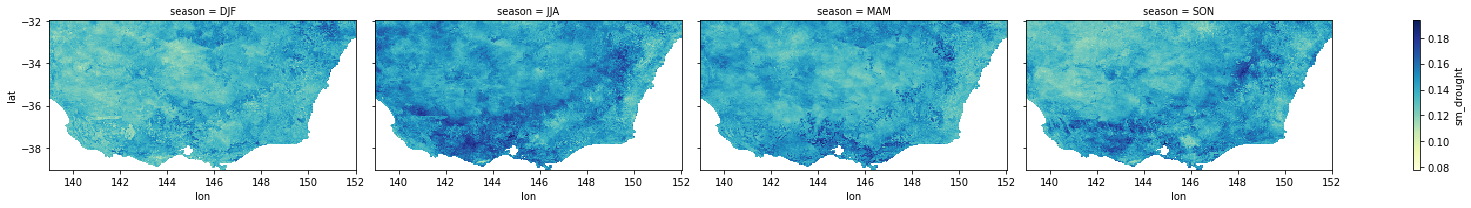

In [4]:
import matplotlib.pyplot as plt

outdir = 'figures/drought_events/'
figname_prefix = 'proportion_of_droughts_10_30perc'

# da_sm_diff = da_sm2.mean('time') - da_sm1.mean('time')
# da_sm_diff_seas = da_sm2.groupby('time.season').mean('time') - da_sm1.groupby('time.season').mean('time')

lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size
levels = np.linspace(-120, 120, 7)
drought_prop_land.plot(cmap = "YlGnBu", size = 3.5, aspect = aspect)
plt.savefig(outdir + figname_prefix + '.png')
# for seas in ['DJF', 'MAM', 'JJA', 'SON']:
#     da_sm_diff_seas_land.sel(season = seas).rename('sm_deficit ' + seas).plot(col = "timescale", col_wrap = 3, aspect = aspect, size = 3, cmap = "coolwarm", levels = levels) #"RdBu_r")
#     plt.savefig(outdir + figname_prefix + '_' + seas + '.png')
drought_prop_seas_land.plot(col = "season", col_wrap = 4, cmap = "YlGnBu", size = 3, aspect = aspect)
# plt.savefig(outdir + figname_prefix + '_bySeas.png') #did not save as this should be same as the original figures using 10th and 50th perc

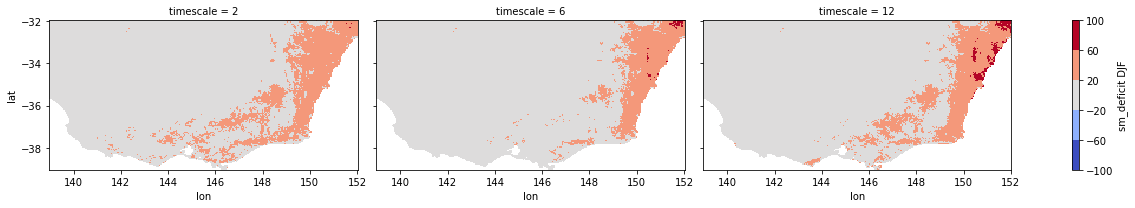

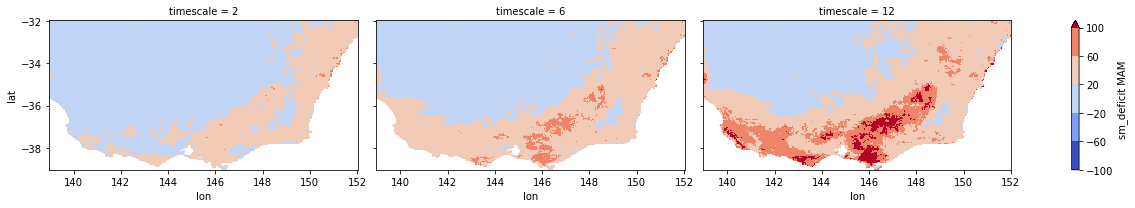

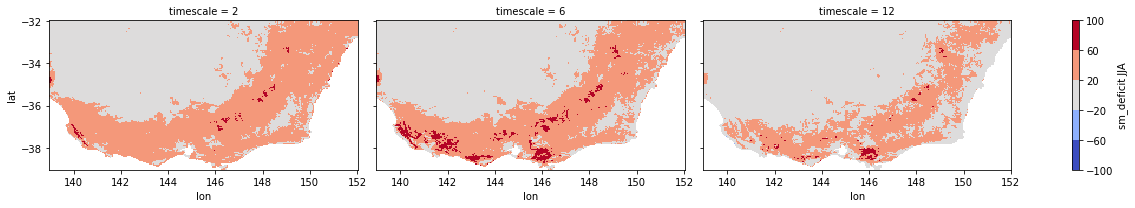

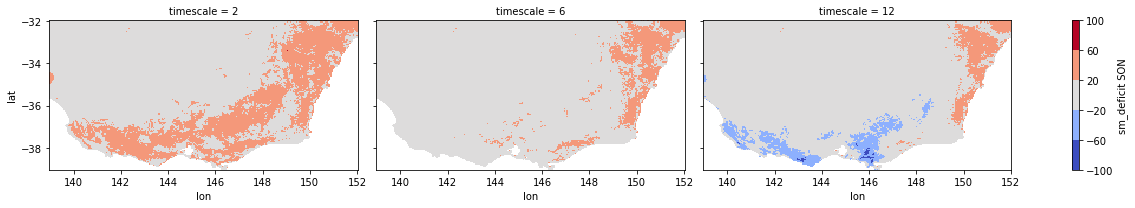

In [5]:
figname_prefix = 'mean_sm_deficit_droughts_10_30perc_2Reg'
levels = np.linspace(-100, 100, 6)
# levels = np.linspace(-140, 140, 8)
for seas in ['DJF', 'MAM', 'JJA', 'SON']:
    da_sm_mean_bySeas.sel(season = seas).rename('sm_deficit ' + seas).plot(col = "timescale", col_wrap = 3, aspect = aspect, size = 3, cmap = "coolwarm", levels = levels) #"RdBu_r")
    # da_sm_mean_bySeas.sel(season = seas).rename('sm_deficit ' + seas).plot(aspect = aspect, size = 3.5, cmap = "coolwarm", levels = levels) #"RdBu_r")
    plt.savefig(outdir + figname_prefix + '_' + seas + '.png') #did not save as this should be same as the original figures using 10th and 50th perc

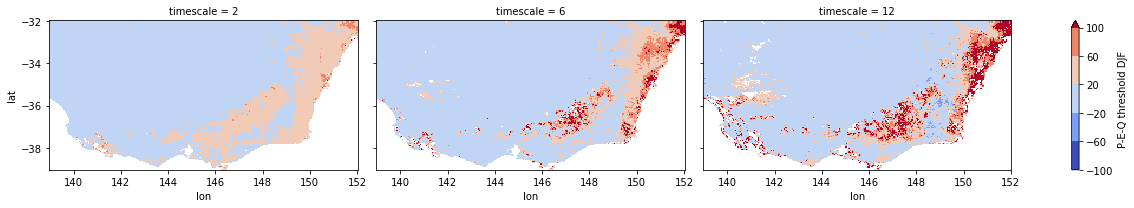

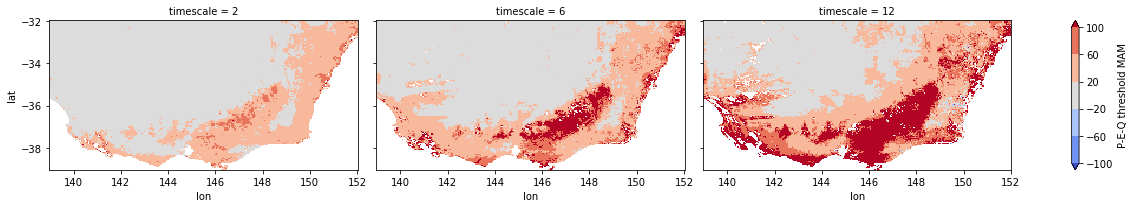

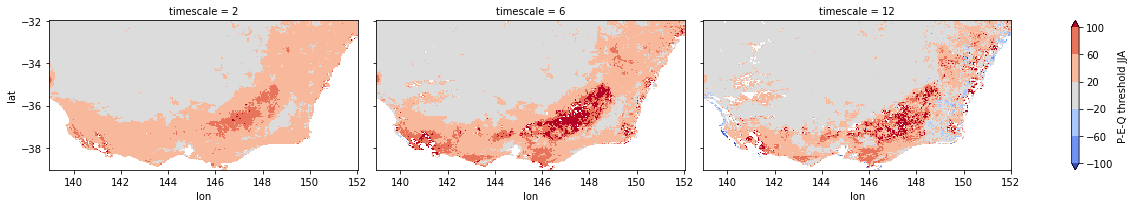

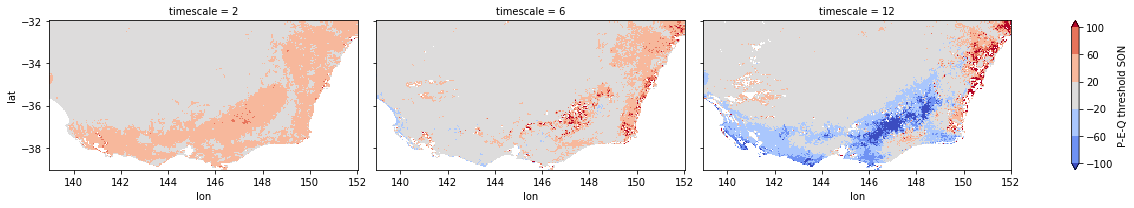

In [6]:
figname_prefix = 'mean_PmEQ_droughts_10_30perc_2Reg'
levels = np.linspace(-100, 100, 6)
#levels = np.linspace(-140, 140, 8)
for seas in ['DJF', 'MAM', 'JJA', 'SON']:
    # if seas == "DJF":
    #     levels = np.linspace(-60, 60, 4)
    # else:
    #     levels = np.linspace(-100, 100, 6)
    da_PmEQ_mean_bySeas.sel(season = seas).rename('P-E-Q threshold ' + seas).plot(col = "timescale", col_wrap = 3, aspect = aspect, size = 3, cmap = "coolwarm", levels = levels) #"RdBu_r")
    plt.savefig(outdir + figname_prefix + '_' + seas + '.png')

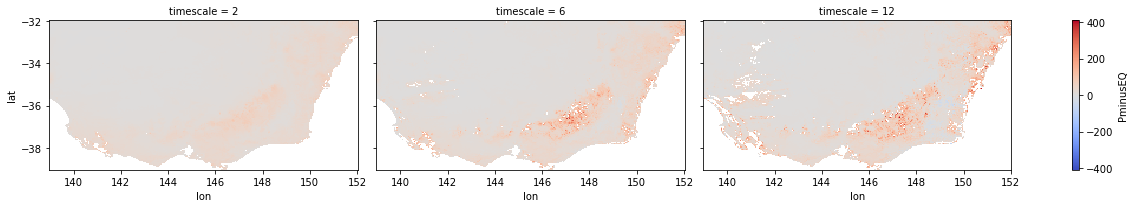

In [7]:
da_PmEQ1.mean('time').plot(col = "timescale", col_wrap = 3, aspect = aspect, size = 3, cmap = "coolwarm") 